In [1]:
import pandas as pd
import ast
import numpy as np
import scipy
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
pd.set_option('mode.chained_assignment', None)

In [2]:
# Reading data from csv file
df = pd.read_csv("200_IM_results.csv")

In [3]:
df.head(10)

,Swimmer name,Year of birth,Country,Time,Splits,Date
0,"CSEH, Laszlo",1985,Hungary,1:57.61,"['24.82', '29.04', '35.18', '28.57']",28 Jul 2005
1,"JANUSAITIS, Vytautas",1981,Lithuania,1:59.72,"['25.83', '30.41', '34.74', '28.74']",27 Jul 2005
2,"BOGGIATTO, Alessio",1981,Italy,2:00.24,"['26.42', '31.24', '34.32', '28.26']",27 Jul 2005
3,"BEREZUTSKIY, Igor",1984,Russia,2:01.11,"['26.11', '30.78', '35.79', '28.43']",27 Jul 2005
4,"TUMIOTTO, Leonardo",1983,Italy,2:01.52,"['26.72', '31.04', '34.31', '29.45']",6 Apr 2005
5,"KEREKJARTO, Tamas",1979,Hungary,2:01.61,"['26.29', '31.05', '1:04.']",25 Jun 2005
6,"FEBBRARO, Nicola",1981,Italy,2:01.70,"['26.84', '31.25', '34.87', '28.74']",10 Jun 2005
7,"FRANCIS, Robin",1982,Great Britain,2:01.90,[],7 Aug 2005
8,"CARRY, David",1981,Great Britain,2:02.16,"['27.29', '31.72', '35.17', '27.98']",27 May 2005
9,"TAIT, Gregor",1979,Great Britain,2:02.20,[],8 Aug 2005


In [4]:
# Inserting "0" value before time to get a format able to convert 
# Deleting strange "M" letter in time value
# Converting Time column to datetime format (only time)
df["Time"] = df.apply(lambda row: ("{}"+row["Time"]).format("0"), axis = 1)
df["Time"] = df.apply(lambda row: row["Time"].rstrip("M"), axis=1)
df["Time"] = pd.to_datetime(df["Time"], format="%M:%S.%f").dt.time

In [5]:
# Sorting rows by Time column
df = df.sort_values(by="Time", ignore_index=True)

In [6]:
df

,Swimmer name,Year of birth,Country,Time,Splits,Date
0,"CSEH, Laszlo",1985,Hungary,00:01:53.480000,"['25.18', '29.03', '29.33', '29.94']",5 Aug 2015
1,"SWITKOWSKI, Jan",1994,Poland,00:01:54.100000,"['25.96', '29.22', '29.68', '29.24']",5 Aug 2015
2,"BROMER, Viktor B.",1993,Denmark,00:01:54.470000,"['25.96', '28.79', '29.42', '30.30']",4 Aug 2015
3,"KENDERESI, Tamas",1996,Hungary,00:01:54.790000,"['26.55', '29.89', '29.74', '28.61']",30 Jun 2015
4,"KOPTELOV, Evgeny",1993,Russia,00:01:54.790000,"['26.04', '29.15', '30.17', '29.43']",7 Jul 2015
...,...,...,...,...,...,...
4920,"IPSEN, Anton Oerskov",1994,Denmark,00:02:08.390000,"['27.78', '33.98', '36.94', '29.69']",13 Jul 2012
4921,"MAURI, Luca",1995,Italy,00:02:08.390000,"['27.88', '34.64', '36.33', '29.54']",8 Aug 2012
4922,"ZELLMANN, Poul",1995,Germany,00:02:08.390000,[],16 Dec 2012
4923,"LEANDER, Tor",1999,Sweden,00:02:08.390000,"['27.53', '33.61', '36.20', '31.05']",8 Jul 2018


In [7]:
# Inserting Ranking column
df.insert(loc=0, column='Ranking', value=np.arange(len(df))+1)

In [8]:
# Convert Splits column from string that looks like a list to list
df["Splits"] = df.apply(lambda row: ast.literal_eval(row['Splits']), axis=1)

In [9]:
df["Year of birth"].unique()

array(['1985', '1994', '1993', '1996', '1984', '1976', '1991', '1989',
       '1995', '1992', '1997', '1978', '1998', '1988', '1983', '1986',
       '1980', '1987', '1982', '1979', '1990', '1999', '1981', '2000',
       '2001', '1977', '2002', '2003', '1975', '1970', '1974', '2004',
       '??', '1966', '2005'], dtype=object)

In [10]:
df.groupby("Year of birth").size()

Year of birth
1966      2
1970      5
1974      1
1975      4
1976      6
1977      5
1978     20
1979     14
1980     23
1981     47
1982     28
1983     53
1984    109
1985    157
1986    156
1987    147
1988    297
1989    254
1990    233
1991    274
1992    367
1993    305
1994    388
1995    339
1996    298
1997    327
1998    267
1999    251
2000    241
2001    157
2002    105
2003     34
2004      9
2005      1
??        1
dtype: int64

In [11]:
# Remove 1 row with Year of birth value == "??"
df = df[df["Year of birth"] != "??"]

In [12]:
# Convert Year of birth column from string to int
df["Year of birth"] = pd.to_numeric(df["Year of birth"])

In [13]:
# Creating function that replace months name with their number equivalent
def date_converter(date):
    months = {"Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06", 
              "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"}
    for month in months.keys():
        if month in date.split():
            date = date.replace(month, months[month])
            break
    return date

In [14]:
# Replace months name with their number equivalent
df["Date"] = df.apply(lambda row: date_converter(row["Date"]), axis = 1)

In [15]:
# Converting Date column from string to date format
df["Date"] = pd.to_datetime(df["Date"])

# SPLITS ANALYSIS

In [16]:
# Getting only these rows that have all split times
splits_df = df[df["Splits"].map(len) == 4]

In [17]:
splits_df

,Ranking,Swimmer name,Year of birth,Country,Time,Splits,Date
0,1,"CSEH, Laszlo",1985,Hungary,00:01:53.480000,"[25.18, 29.03, 29.33, 29.94]",2015-05-08
1,2,"SWITKOWSKI, Jan",1994,Poland,00:01:54.100000,"[25.96, 29.22, 29.68, 29.24]",2015-05-08
2,3,"BROMER, Viktor B.",1993,Denmark,00:01:54.470000,"[25.96, 28.79, 29.42, 30.30]",2015-04-08
3,4,"KENDERESI, Tamas",1996,Hungary,00:01:54.790000,"[26.55, 29.89, 29.74, 28.61]",2015-06-30
4,5,"KOPTELOV, Evgeny",1993,Russia,00:01:54.790000,"[26.04, 29.15, 30.17, 29.43]",2015-07-07
...,...,...,...,...,...,...,...
4918,4919,"LEANDER, Tor",1999,Sweden,00:02:08.390000,"[27.53, 33.61, 36.20, 31.05]",2018-08-07
4920,4921,"IPSEN, Anton Oerskov",1994,Denmark,00:02:08.390000,"[27.78, 33.98, 36.94, 29.69]",2012-07-13
4921,4922,"MAURI, Luca",1995,Italy,00:02:08.390000,"[27.88, 34.64, 36.33, 29.54]",2012-08-08
4923,4924,"LEANDER, Tor",1999,Sweden,00:02:08.390000,"[27.53, 33.61, 36.20, 31.05]",2018-08-07


In [18]:
# Converting split values from string to float
splits_df["Splits"] = splits_df.apply(lambda row: [float(split) for split in row["Splits"]], axis=1)

In [19]:
# Creating columns with split time for each style of individual medley
splits_df[["Butterfly", "Backstroke", "Breastroke", "Freestyle"]] = pd.DataFrame(splits_df["Splits"].values.tolist(), 
                                                                                 index=splits_df.index)

In [20]:
# Dropping Splits column
splits_df = splits_df.drop("Splits", axis = 1 )

In [21]:
# Creating function to convert Time from datetime format to float in seconds
def to_seconds(time):
    return time.minute*60 + time.second + time.microsecond/1000000

In [22]:
# Creating column with Time in seconds
splits_df["Time in secs"] = splits_df.apply(lambda row: to_seconds(row["Time"]), axis = 1)

In [23]:
splits_df = splits_df[splits_df.columns[[0,1,2,3,4,10,6,7,8,9,5]]]

In [24]:
splits_df

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date
0,1,"CSEH, Laszlo",1985,Hungary,00:01:53.480000,113.48,25.18,29.03,29.33,29.94,2015-05-08
1,2,"SWITKOWSKI, Jan",1994,Poland,00:01:54.100000,114.10,25.96,29.22,29.68,29.24,2015-05-08
2,3,"BROMER, Viktor B.",1993,Denmark,00:01:54.470000,114.47,25.96,28.79,29.42,30.30,2015-04-08
3,4,"KENDERESI, Tamas",1996,Hungary,00:01:54.790000,114.79,26.55,29.89,29.74,28.61,2015-06-30
4,5,"KOPTELOV, Evgeny",1993,Russia,00:01:54.790000,114.79,26.04,29.15,30.17,29.43,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...
4918,4919,"LEANDER, Tor",1999,Sweden,00:02:08.390000,128.39,27.53,33.61,36.20,31.05,2018-08-07
4920,4921,"IPSEN, Anton Oerskov",1994,Denmark,00:02:08.390000,128.39,27.78,33.98,36.94,29.69,2012-07-13
4921,4922,"MAURI, Luca",1995,Italy,00:02:08.390000,128.39,27.88,34.64,36.33,29.54,2012-08-08
4923,4924,"LEANDER, Tor",1999,Sweden,00:02:08.390000,128.39,27.53,33.61,36.20,31.05,2018-08-07


## Butterfly

Calculating which style is the worst for each swimmer. This measure is calculated based on mean result for each style.
Measure is not based on comparing with the best result to avoid outliers. Sometimes swimmer is trying to beat his own record
only for one style, not whole distance. Then this split time is not typical for the IM distance.
Ratio = split_time / mean_time

In [25]:
# Displaying 5 the best results in Butterfly split
splits_df.nsmallest(5, "Butterfly")

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date
441,442,"POPOV, Dmitriy",2000,Russia,00:02:00.860000,120.86,17.47,40.63,25.33,37.43,2015-07-31
2741,2742,"STRAVIUS, Jeremy",1988,France,00:02:06,126.00,24.36,34.46,40.22,26.96,2016-03-29
3763,3764,"MILADINOV, Josif",2003,Bulgaria,00:02:07.360000,127.36,24.41,33.37,37.78,31.80,2019-04-14
96,97,"CSEH, Laszlo",1985,Hungary,00:01:58.170000,118.17,24.46,29.54,35.17,29.00,2016-05-17
72,73,"STRAVIUS, Jeremy",1988,France,00:01:57.890000,117.89,24.61,29.69,35.67,27.92,2013-11-04


In [26]:
# 17.47 in 50m butterfly is impossible, because World Record equals to 22,27 (01.07.2018). Probably measuring system problem.
# So we have to drop this row in our analysis
splits_df = splits_df[splits_df["Butterfly"] != 17.47]

In [27]:
splits_df.nsmallest(5, "Butterfly")

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date
2741,2742,"STRAVIUS, Jeremy",1988,France,00:02:06,126.00,24.36,34.46,40.22,26.96,2016-03-29
3763,3764,"MILADINOV, Josif",2003,Bulgaria,00:02:07.360000,127.36,24.41,33.37,37.78,31.80,2019-04-14
96,97,"CSEH, Laszlo",1985,Hungary,00:01:58.170000,118.17,24.46,29.54,35.17,29.00,2016-05-17
72,73,"STRAVIUS, Jeremy",1988,France,00:01:57.890000,117.89,24.61,29.69,35.67,27.92,2013-11-04
7,8,"CSEH, Laszlo",1985,Hungary,00:01:55.180000,115.18,24.72,29.06,33.62,27.78,2009-07-29


In [28]:
splits_df.nlargest(5, "Butterfly")

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date
4924,4925,"CASTERA, Mathis",1996,France,00:02:08.390000,128.39,29.35,32.20,38.37,28.47,2016-07-30
4233,4234,"CHRISTENSEN, Chris",1988,Denmark,00:02:07.860000,127.86,28.87,32.07,35.98,30.94,2013-08-24
4378,4379,"ROSSO, Christian",1995,Italy,00:02:07.980000,127.98,28.79,33.51,36.63,29.05,2011-08-08
4381,4382,"ROSSO, Christian",1995,Italy,00:02:07.980000,127.98,28.79,33.51,36.63,29.05,2011-08-08
3703,3704,"GEZMIS, Ergecan",1998,Turkey,00:02:07.290000,127.29,28.77,32.42,37.35,28.75,2017-03-18


In [29]:
# There aren't impossible results for butterfly split, so computing mean reasult
butterfly_mean = float(splits_df[["Butterfly"]].mean())
print(butterfly_mean)

26.911820303383898


## Backstroke

In [30]:
splits_df.nsmallest(5, "Backstroke")

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date
19,20,"CSEH, Laszlo",1985,Hungary,00:01:56.520000,116.52,24.95,28.50,34.56,28.51,2008-08-15
2,3,"BROMER, Viktor B.",1993,Denmark,00:01:54.470000,114.47,25.96,28.79,29.42,30.30,2015-04-08
8,9,"SKVORTSOV, Nikolay",1984,Russia,00:01:55.220000,115.22,25.57,28.80,29.96,30.89,2007-03-28
78,79,"VAZAIOS, Andreas",1994,Greece,00:01:57.980000,117.98,25.83,28.84,34.41,28.90,2017-07-26
61,62,"CSEH, Laszlo",1985,Hungary,00:01:57.730000,117.73,24.94,28.88,34.73,29.18,2010-11-08


In [31]:
splits_df.nlargest(5, "Backstroke")

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date
3489,3490,"KARPENKO, Oleksandr",1995,Ukraine,00:02:07.040000,127.04,26.39,36.12,34.28,30.25,2016-03-20
4437,4438,"RAEISAENEN, Daniel",1999,Sweden,00:02:08.030000,128.03,26.20,36.10,35.00,30.73,2019-02-07
4814,4815,"JOHANNESSEN, Frans",1992,Denmark,00:02:08.300000,128.30,26.90,36.07,35.04,30.29,2011-07-26
4690,4691,"LAGERQVIST, Anton",1991,Sweden,00:02:08.210000,128.21,27.60,35.90,34.51,30.20,2009-02-07
4867,4868,"HULBOJ, Marcin",1996,Poland,00:02:08.350000,128.35,27.54,35.88,34.34,30.59,2014-07-19


In [32]:
# There aren't impossible results for backstroke split, so computing mean reasult
backstroke_mean = float(splits_df[["Backstroke"]].mean())
print(backstroke_mean)

32.1210764294049


## Breastroke

In [33]:
splits_df.nsmallest(5, "Breastroke")

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date
0,1,"CSEH, Laszlo",1985,Hungary,00:01:53.480000,113.48,25.18,29.03,29.33,29.94,2015-05-08
16,17,"KUDASHEV, Alexander",1995,Russia,00:01:56.300000,116.30,25.65,30.01,29.38,31.26,2015-04-21
146,147,"KHARLANOV, Alexander",1995,Russia,00:01:58.900000,118.90,26.50,30.43,29.40,32.57,2015-04-20
2,3,"BROMER, Viktor B.",1993,Denmark,00:01:54.470000,114.47,25.96,28.79,29.42,30.30,2015-04-08
1,2,"SWITKOWSKI, Jan",1994,Poland,00:01:54.100000,114.10,25.96,29.22,29.68,29.24,2015-05-08


In [34]:
splits_df.nlargest(5, "Breastroke")

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date
4807,4808,"CRESCENZO, Riccardo",1997,Italy,00:02:08.300000,128.30,26.06,31.85,41.24,29.15,2018-07-22
4810,4811,"CRESCENZO, Riccardo",1997,Italy,00:02:08.300000,128.30,26.06,31.85,41.24,29.15,2018-07-22
3400,3401,"ISAKOV, Olexandr",1989,Ukraine,00:02:06.910000,126.91,25.55,30.81,40.91,29.64,2012-08-05
4768,4769,"LIESS, Nils",1996,Switzerland,00:02:08.270000,128.27,26.53,32.71,40.66,28.37,2017-06-05
4771,4772,"LIESS, Nils",1996,Switzerland,00:02:08.270000,128.27,26.53,32.71,40.66,28.37,2017-06-05


In [35]:
# There aren't impossible results for breastroke split, so computing mean reasult
breastroke_mean = float(splits_df[["Breastroke"]].mean())
print(breastroke_mean)

35.842114935822636


## Freestyle

In [36]:
splits_df.nsmallest(5, "Freestyle")

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date
2142,2143,"MAJCHRZAK, Kacper",1992,Poland,00:02:04.960000,124.96,27.53,35.15,36.16,26.12,2019-03-23
2741,2742,"STRAVIUS, Jeremy",1988,France,00:02:06,126.00,24.36,34.46,40.22,26.96,2016-03-29
3806,3807,"BERG EISCHEID, Moritz",1993,Spain,00:02:07.400000,127.40,26.82,34.79,38.69,27.10,2018-10-02
159,160,"RAPSYS, Danas",1995,Lithuania,00:01:59.140000,119.14,25.04,30.16,36.83,27.11,2019-08-16
2027,2028,"AGNEL, Yannick",1992,France,00:02:04.710000,124.71,27.31,32.62,37.46,27.32,2012-01-21


In [37]:
splits_df.nlargest(5, "Freestyle")

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date
1890,1891,"AVERCHENKO, Alexey",1993,Russia,00:02:04.450000,124.45,26.12,30.53,32.14,35.66,2015-04-20
1547,1548,"GARDONIO, Luca",1979,Italy,00:02:03.880000,123.88,27.22,30.24,31.73,34.69,2006-03-25
1618,1619,"STACCHIOTTI, Raphael",1992,Luxembourg,00:02:03.990000,123.99,26.34,31.10,32.34,34.21,2015-02-11
764,765,"PALAZOV, Georgi",1980,Bulgaria,00:02:02.020000,122.02,26.04,29.99,31.81,34.18,2007-03-27
1992,1993,"JAMMES, Thomas",1996,France,00:02:04.640000,124.64,27.42,31.14,31.94,34.14,2015-03-04


In [38]:
# There aren't impossible results for freestyle split, so computing mean reasult
freestyle_mean = float(splits_df[["Freestyle"]].mean())
print(freestyle_mean)

29.961648191365228


In [39]:
# Computing style ratio for each swimmer. The highest ratio, the worst style for the swimmer.
splits_df["Butterfly ratio"] = splits_df.apply(lambda row: row["Butterfly"]/butterfly_mean, axis = 1)
splits_df["Backstroke ratio"] = splits_df.apply(lambda row: row["Backstroke"]/backstroke_mean, axis = 1)
splits_df["Breastroke ratio"] = splits_df.apply(lambda row: row["Breastroke"]/breastroke_mean, axis = 1)
splits_df["Freestyle ratio"] = splits_df.apply(lambda row: row["Freestyle"]/freestyle_mean, axis = 1)

In [40]:
splits_df

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date,Butterfly ratio,Backstroke ratio,Breastroke ratio,Freestyle ratio
0,1,"CSEH, Laszlo",1985,Hungary,00:01:53.480000,113.48,25.18,29.03,29.33,29.94,2015-05-08,0.935648,0.903768,0.818311,0.999277
1,2,"SWITKOWSKI, Jan",1994,Poland,00:01:54.100000,114.10,25.96,29.22,29.68,29.24,2015-05-08,0.964632,0.909683,0.828076,0.975914
2,3,"BROMER, Viktor B.",1993,Denmark,00:01:54.470000,114.47,25.96,28.79,29.42,30.30,2015-04-08,0.964632,0.896296,0.820822,1.011293
3,4,"KENDERESI, Tamas",1996,Hungary,00:01:54.790000,114.79,26.55,29.89,29.74,28.61,2015-06-30,0.986555,0.930542,0.829750,0.954887
4,5,"KOPTELOV, Evgeny",1993,Russia,00:01:54.790000,114.79,26.04,29.15,30.17,29.43,2015-07-07,0.967605,0.907504,0.841747,0.982256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,4919,"LEANDER, Tor",1999,Sweden,00:02:08.390000,128.39,27.53,33.61,36.20,31.05,2018-08-07,1.022971,1.046353,1.009985,1.036325
4920,4921,"IPSEN, Anton Oerskov",1994,Denmark,00:02:08.390000,128.39,27.78,33.98,36.94,29.69,2012-07-13,1.032260,1.057872,1.030631,0.990933
4921,4922,"MAURI, Luca",1995,Italy,00:02:08.390000,128.39,27.88,34.64,36.33,29.54,2012-08-08,1.035976,1.078420,1.013612,0.985927
4923,4924,"LEANDER, Tor",1999,Sweden,00:02:08.390000,128.39,27.53,33.61,36.20,31.05,2018-08-07,1.022971,1.046353,1.009985,1.036325


In [41]:
# Creating function to check which style is the worst
def worst_style_checker(fly, back, frog, free):
    ratios = [fly, back, frog, free]
    if max(ratios) == fly:
        return "Butterfly"
    elif max(ratios) == back:
        return "Backstroke"
    elif max(ratios) == frog:
        return "Breastroke"
    else:
        return "Freestyle"

In [42]:
# Creating new column with the worst style for each swimmer
splits_df["Worst style"] = splits_df.apply(lambda row: worst_style_checker(row["Butterfly ratio"], 
                                                                           row["Backstroke ratio"], 
                                                                           row["Breastroke ratio"], 
                                                                           row["Freestyle ratio"]), axis=1)

In [43]:
# Creating new column with intervals to assign a place in the ranking to the Ranking interval. Range is equal to 100.
# Skipping last 25 results to get equal intervals.
splits_df["Ranking interval"] = pd.cut(splits_df.Ranking,[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,
                                                         1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900,
                                                         2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800,
                                                         2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 
                                                         3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600,
                                                         4700, 4800, 4900],right=True)

In [44]:
splits_df

,Ranking,Swimmer name,Year of birth,Country,Time,Time in secs,Butterfly,Backstroke,Breastroke,Freestyle,Date,Butterfly ratio,Backstroke ratio,Breastroke ratio,Freestyle ratio,Worst style,Ranking interval
0,1,"CSEH, Laszlo",1985,Hungary,00:01:53.480000,113.48,25.18,29.03,29.33,29.94,2015-05-08,0.935648,0.903768,0.818311,0.999277,Freestyle,"(0.0, 100.0]"
1,2,"SWITKOWSKI, Jan",1994,Poland,00:01:54.100000,114.10,25.96,29.22,29.68,29.24,2015-05-08,0.964632,0.909683,0.828076,0.975914,Freestyle,"(0.0, 100.0]"
2,3,"BROMER, Viktor B.",1993,Denmark,00:01:54.470000,114.47,25.96,28.79,29.42,30.30,2015-04-08,0.964632,0.896296,0.820822,1.011293,Freestyle,"(0.0, 100.0]"
3,4,"KENDERESI, Tamas",1996,Hungary,00:01:54.790000,114.79,26.55,29.89,29.74,28.61,2015-06-30,0.986555,0.930542,0.829750,0.954887,Butterfly,"(0.0, 100.0]"
4,5,"KOPTELOV, Evgeny",1993,Russia,00:01:54.790000,114.79,26.04,29.15,30.17,29.43,2015-07-07,0.967605,0.907504,0.841747,0.982256,Freestyle,"(0.0, 100.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,4919,"LEANDER, Tor",1999,Sweden,00:02:08.390000,128.39,27.53,33.61,36.20,31.05,2018-08-07,1.022971,1.046353,1.009985,1.036325,Backstroke,NaN
4920,4921,"IPSEN, Anton Oerskov",1994,Denmark,00:02:08.390000,128.39,27.78,33.98,36.94,29.69,2012-07-13,1.032260,1.057872,1.030631,0.990933,Backstroke,NaN
4921,4922,"MAURI, Luca",1995,Italy,00:02:08.390000,128.39,27.88,34.64,36.33,29.54,2012-08-08,1.035976,1.078420,1.013612,0.985927,Backstroke,NaN
4923,4924,"LEANDER, Tor",1999,Sweden,00:02:08.390000,128.39,27.53,33.61,36.20,31.05,2018-08-07,1.022971,1.046353,1.009985,1.036325,Backstroke,NaN


In [45]:
# Creating dataframe with only necessary columns to draw plots
plot_grpby = splits_df.groupby(['Worst style', 'Ranking interval'])

In [46]:
plot_df = plot_grpby.size().to_frame("Count").reset_index()

In [47]:
plot_df

,Worst style,Ranking interval,Count
0,Backstroke,"(0, 100]",3
1,Backstroke,"(100, 200]",6
2,Backstroke,"(200, 300]",6
3,Backstroke,"(300, 400]",3
4,Backstroke,"(400, 500]",5
...,...,...,...
191,Freestyle,"(4400, 4500]",1
192,Freestyle,"(4500, 4600]",6
193,Freestyle,"(4600, 4700]",7
194,Freestyle,"(4700, 4800]",5


### Drawing plot for each style as the worst style with number of swimmers per interval

In [48]:
butterfly_plot = plot_df[plot_df["Worst style"] == "Butterfly"].reset_index(drop = True)

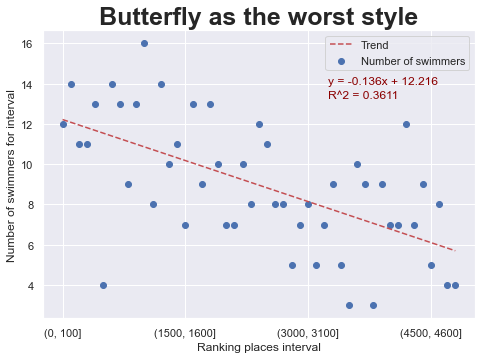

In [49]:
fig1 = plt.figure()
sns.set()

x1 = butterfly_plot["Ranking interval"]
y1 = butterfly_plot["Count"]

ax1 = fig1.add_axes([0,0,1,1])
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))

ax1.scatter(x1.astype(str), y1, color="b")
ax1.set_xlabel("Ranking places interval")
ax1.set_ylabel("Number of swimmers for interval")
ax1.set_title("Butterfly as the worst style", size=25, fontweight="bold")

slope1, intercept1, r_value1, p_value1, std_err1 = scipy.stats.linregress(x1.index.values, y1)

plt.plot(x1.index.values, slope1*x1.index.values+intercept1, "r--")
plt.legend(["Trend","Number of swimmers"])
plt.text(32.5,14,"y = %.3fx + %.3f"%(slope1,intercept1), color="darkred")
plt.text(32.5,13.3,"R^2 = %.4f"%(r_value1**2), color="darkred")
plt.show()

In [50]:
backstroke_plot = plot_df[plot_df["Worst style"] == "Backstroke"].reset_index(drop = True)

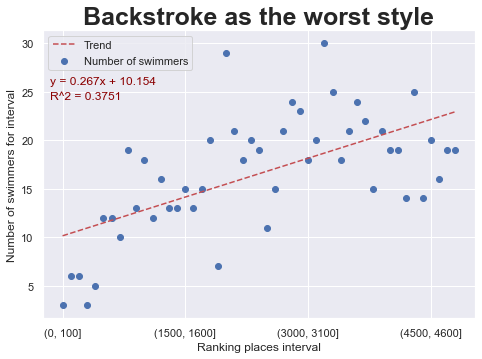

In [51]:
fig2 = plt.figure()

x2 = backstroke_plot["Ranking interval"]
y2 = backstroke_plot["Count"]

ax2 = fig2.add_axes([0,0,1,1])
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))

ax2.scatter(x2.astype(str), y2, color="b")
ax2.set_xlabel("Ranking places interval")
ax2.set_ylabel("Number of swimmers for interval")
ax2.set_title("Backstroke as the worst style", size=25, fontweight="bold")

slope2, intercept2, r_value2, p_value2, std_err2 = scipy.stats.linregress(x2.index.values, y2)

plt.plot(x2.index.values, slope2*x2.index.values+intercept2, "r--")
plt.legend(["Trend","Number of swimmers"], loc=2)
plt.text(-1.5,25.8,"y = %.3fx + %.3f"%(slope2,intercept2), color="darkred")
plt.text(-1.5,24.3,"R^2 = %.4f"%(r_value2**2), color="darkred")
plt.show()

In [52]:
breastroke_plot = plot_df[plot_df["Worst style"] == "Breastroke"].reset_index(drop = True)

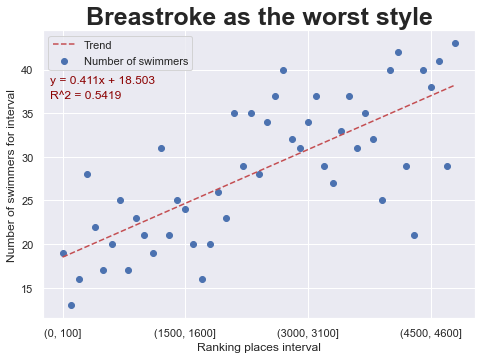

In [53]:
fig = plt.figure()
sns.set()

x = breastroke_plot["Ranking interval"]
y = breastroke_plot["Count"]

ax=fig.add_axes([0,0,1,1])
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

ax.scatter(x.astype(str), y, color="b")
ax.set_xlabel("Ranking places interval")
ax.set_ylabel("Number of swimmers for interval")
ax.set_title("Breastroke as the worst style", size=25, fontweight="bold")

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x.index.values, y)

plt.plot(x.index.values, slope*x.index.values+intercept, "r--")
plt.legend(["Trend","Number of swimmers"])
plt.text(-1.5,38.5,"y = %.3fx + %.3f"%(slope,intercept), color="darkred")
plt.text(-1.5,36.7,"R^2 = %.4f"%(r_value**2), color="darkred")
plt.show()

In [54]:
freestyle_plot = plot_df[plot_df["Worst style"] == "Freestyle"].reset_index(drop = True)

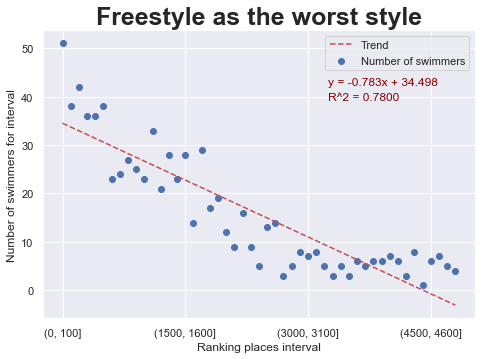

In [55]:
fig4 = plt.figure()

x4 = freestyle_plot["Ranking interval"]
y4 = freestyle_plot["Count"]

ax4 = fig4.add_axes([0,0,1,1])
ax4.xaxis.set_major_locator(plt.MaxNLocator(5))

ax4.scatter(x4.astype(str), y4, color='b')
ax4.set_xlabel("Ranking places interval")
ax4.set_ylabel("Number of swimmers for interval")
ax4.set_title("Freestyle as the worst style", size=25, fontweight="bold")

slope4, intercept4, r_value4, p_value4, std_err4 = scipy.stats.linregress(x4.index.values, y4)

plt.plot(x4.index.values, slope4*x4.index.values+intercept4, "r--")
plt.legend(["Trend","Number of swimmers"])
plt.text(32.5,42.3,"y = %.3fx + %.3f"%(slope4,intercept4), color="darkred")
plt.text(32.5,39.3,"R^2 = %.4f"%(r_value4**2), color="darkred")
plt.show()